In [19]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import itertools
import sys
import sklearn.preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dense, Flatten, Dropout


sys.path.append("../1_Format_donnees/")
sys.path.append("../")
from aggregation import load_and_preprocess_agg_window, Scaler_Metrics
from evaluate import plot_confusion_matrix

In [2]:
DEFAULT_LENGTH_Value = 60

In [3]:
df_train = load_and_preprocess_agg_window("../Mesures/train", length_value = DEFAULT_LENGTH_Value)

df_test = load_and_preprocess_agg_window("../Mesures/test", length_value = DEFAULT_LENGTH_Value)
df_test


Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/39


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 120.29it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/39


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 37.78it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 3/39


100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 114.08it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 4/39


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00, 13.13it/s]


Extracting ../Mesures/train\messenger20221129_151124.csv.... 5/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.39it/s]


Extracting ../Mesures/train\messenger20230207_133921.csv.... 6/39


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.29it/s]


Extracting ../Mesures/train\messenger20230209_083453.csv.... 7/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.02it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 8/39


100%|██████████████████████████████████████████████████████████████████████████████| 805/805 [00:00<00:00, 1233.69it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 9/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.37it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 10/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 37.88it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 11/39


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  4.21it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 12/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.80it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 13/39


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 47.06it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 14/39


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 32.32it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 15/39


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.73it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 16/39


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.91it/s]


Extracting ../Mesures/train\spotify20230201_092702.csv.... 17/39


100%|████████████████████████████████████████████████████████████████████████████| 1750/1750 [00:01<00:00, 1241.87it/s]


Extracting ../Mesures/train\spotify20230203_165507.csv.... 18/39


100%|██████████████████████████████████████████████████████████████████████████████| 522/522 [00:00<00:00, 1410.77it/s]


Extracting ../Mesures/train\spotify20230216_141318.csv.... 19/39


100%|██████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 1008.22it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 20/39


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 114.23it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 21/39


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 58.42it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 22/39


100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [00:01<00:00, 87.43it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 23/39


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 111.31it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 24/39


100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 326.07it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 25/39


100%|███████████████████████████████████████████████████████████████████████████████| 426/426 [00:00<00:00, 926.49it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 26/39


100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 612.68it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 27/39


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 399.76it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 28/39


100%|██████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 1271.41it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 29/39


100%|████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 1024.58it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 30/39


100%|████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 1085.82it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 31/39


100%|████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 1428.04it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 32/39


100%|████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 1203.24it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 33/39


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 575.74it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 34/39


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 829.94it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 35/39


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 682.14it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 36/39


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 958.47it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 37/39


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 383.17it/s]


Extracting ../Mesures/train\youtube20230118_134041.csv.... 38/39


100%|███████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 302.66it/s]


Extracting ../Mesures/train\youtube20230124_124323.csv.... 39/39


100%|█████████████████████████████████████████████████████████████████████████████| 5593/5593 [00:54<00:00, 103.40it/s]


Extracting ../Mesures/test\messenger20221124_151137.csv.... 1/7


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 21.71it/s]


Extracting ../Mesures/test\messenger20230208_132747.csv.... 2/7


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  7.29it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 3/7


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.29it/s]


Extracting ../Mesures/test\spotify20230127_134348.csv.... 4/7


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1196.87it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 5/7


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 23.13it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 6/7


100%|██████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 1200.57it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 7/7


100%|████████████████████████████████████████████████████████████████████████████████| 765/765 [00:19<00:00, 38.46it/s]


,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221124_151137_4_0,308.521739,687.88587,1067.25,1013.396825,1496.222222,713.52381,1561.5,899.897436,1168.0,972.756757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_1,687.88587,1067.25,1013.396825,1496.222222,713.52381,1561.5,899.897436,1168.0,972.756757,1713.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_2,1067.25,1013.396825,1496.222222,713.52381,1561.5,899.897436,1168.0,972.756757,1713.333333,630.967742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_3,1013.396825,1496.222222,713.52381,1561.5,899.897436,1168.0,972.756757,1713.333333,630.967742,874.037351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221124_151137_4_4,1496.222222,713.52381,1561.5,899.897436,1168.0,972.756757,1713.333333,630.967742,874.037351,1117.106961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230117_121925_263_43,355.158974,457.517949,559.876923,662.235897,764.594872,866.953846,969.312821,1071.671795,1174.030769,1003.989744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_44,457.517949,559.876923,662.235897,764.594872,866.953846,969.312821,1071.671795,1174.030769,1003.989744,833.948718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_45,559.876923,662.235897,764.594872,866.953846,969.312821,1071.671795,1174.030769,1003.989744,833.948718,663.907692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_46,662.235897,764.594872,866.953846,969.312821,1071.671795,1174.030769,1003.989744,833.948718,663.907692,493.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube


# Noise

In [42]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221117_125310_4_0,320.0,914.730159,1509.460317,1245.169231,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_1,914.730159,1509.460317,1245.169231,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,644.242424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_2,1509.460317,1245.169231,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,644.242424,740.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_3,1245.169231,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,644.242424,740.636364,837.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_4,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,644.242424,740.636364,837.030303,933.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_166_41,342.197802,1027.632234,1713.066667,1521.530398,1329.99413,1138.457862,946.921593,755.385325,563.849057,708.165289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_42,1027.632234,1713.066667,1521.530398,1329.99413,1138.457862,946.921593,755.385325,563.849057,708.165289,732.261136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_43,1713.066667,1521.530398,1329.99413,1138.457862,946.921593,755.385325,563.849057,708.165289,732.261136,756.356983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230124_124323_166_44,1521.530398,1329.99413,1138.457862,946.921593,755.385325,563.849057,708.165289,732.261136,756.356983,780.45283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube


In [69]:
df_train=df_train[df_train.label!="noise"]

In [70]:
df_test = df_test[df_test.label!="noise"]

# Scale

In [71]:
scaler = Scaler_Metrics()
training_data = scaler.fit_transform(df_train)
testing_data = scaler.transform(df_test)

20221124_151137_4_0       messenger
20221124_151137_4_1       messenger
20221124_151137_4_2       messenger
20221124_151137_4_3       messenger
20221124_151137_4_4       messenger
                            ...    
20230117_121925_263_43      youtube
20230117_121925_263_44      youtube
20230117_121925_263_45      youtube
20230117_121925_263_46      youtube
20230117_121925_263_47      youtube
Name: label, Length: 149519, dtype: object


In [72]:
training_data

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
id,,,,,,,,,,,,,,,,,,,,,
20221117_125310_4_0,-1.753921,-1.334220,-0.913343,-1.101539,-0.887560,-1.055931,-1.801776,-1.733633,-1.664624,-1.595734,...,-0.033848,-0.033913,-0.033963,-0.034023,-0.034089,-0.034148,-0.034205,-0.034226,-0.034269,messenger
20221117_125310_4_1,-1.332309,-0.912289,-1.101006,-0.887561,-1.056158,-1.801398,-1.733352,-1.665207,-1.596234,-1.527381,...,-0.033848,-0.033913,-0.033963,-0.034023,-0.034089,-0.034148,-0.034205,-0.034226,-0.034269,messenger
20221117_125310_4_2,-0.910697,-1.099790,-0.887089,-1.056211,-1.801936,-1.732983,-1.664928,-1.596780,-1.527844,-1.459028,...,-0.033848,-0.033913,-0.033963,-0.034023,-0.034089,-0.034148,-0.034205,-0.034226,-0.034269,messenger
20221117_125310_4_3,-1.098056,-0.886057,-1.055691,-1.802216,-1.733492,-1.664567,-1.596503,-1.528354,-1.459454,-1.390675,...,-0.033848,-0.033913,-0.033963,-0.034023,-0.034089,-0.034148,-0.034205,-0.034226,-0.034269,messenger
20221117_125310_4_4,-0.884485,-1.054514,-1.801482,-1.733751,-1.665047,-1.596151,-1.528079,-1.459927,-1.391064,-1.322322,...,-0.033848,-0.033913,-0.033963,-0.034023,-0.034089,-0.034148,-0.034205,-0.034226,-0.034269,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230124_124323_166_41,-1.738185,-1.254122,-0.768770,-0.905250,-1.041243,-1.176965,-1.313225,-1.449457,-1.584882,-1.482053,...,-0.033848,-0.033913,-0.033963,-0.034023,-0.034089,-0.034148,-0.034205,-0.034226,-0.034269,youtube
20230124_124323_166_42,-1.252271,-0.767840,-0.904773,-1.041291,-1.177243,-1.312908,-1.449185,-1.585422,-1.482492,-1.464967,...,-0.033848,-0.033913,-0.033963,-0.034023,-0.034089,-0.034148,-0.034205,-0.034226,-0.034269,youtube
20230124_124323_166_43,-0.766357,-0.903726,-1.040775,-1.177332,-1.313243,-1.448851,-1.585145,-1.482977,-1.465396,-1.447881,...,-0.033848,-0.033913,-0.033963,-0.034023,-0.034089,-0.034148,-0.034205,-0.034226,-0.034269,youtube


In [73]:
data_col = training_data.columns[:-1]
X_train, X_test = training_data[data_col].values, testing_data[data_col].values
X_train, X_test = X_train.reshape((-1,DEFAULT_LENGTH_Value,2), order='F'), X_test.reshape((-1,DEFAULT_LENGTH_Value,2), order='F')
y_train, y_test = training_data.label, testing_data.label
X_train[0,:5]

array([[-1.75, -0.03],
       [-1.33, -0.03],
       [-0.91, -0.03],
       [-1.1 , -0.03],
       [-0.89,  0.45]])

# Binarize

In [74]:


label_binarizer = sklearn.preprocessing.LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)
y_test_encoded = label_binarizer.transform(y_test)

y_test_encoded

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [75]:
uniq_label = training_data.label.unique()
correspondance = dict(zip(uniq_label,label_binarizer.transform(uniq_label)))
correspondance


{'messenger': array([1, 0, 0, 0, 0]),
 'skype': array([0, 1, 0, 0, 0]),
 'spotify': array([0, 0, 1, 0, 0]),
 'twitch': array([0, 0, 0, 1, 0]),
 'youtube': array([0, 0, 0, 0, 1])}

# Class_weight

In [76]:


class_weights = dict(zip(np.unique(np.argmax(y_train_encoded, axis = 1)), compute_class_weight(class_weight ='balanced',
                                                  classes =np.unique(y_train),
                                                               y =y_train)))
class_weights

{0: 0.6709188087593486,
 1: 0.4922834934473176,
 2: 3.185149689667762,
 3: 1.5715958476885317,
 4: 1.8942840082510042}

# Train

In [77]:

X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.01, random_state=42)

In [78]:
X_train.shape

(345475, 60, 2)

In [79]:
model = Sequential()

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D()) #Adding a convultion layer

model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPool1D()) #

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_weights.keys()), activation='sigmoid'))




In [80]:
#Conv 1 : output_shape= (None, length_values-5+1,32)    (None, 56,32)
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics =['accuracy'])
model.build((None, 60, 2))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 56, 32)            352       
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 28, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_20 (Conv1D)          (None, 24, 64)            10304     
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 12, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 8, 32)             10272     
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 4, 32)           

In [81]:
val_data = (X_val,y_val_encoded)
val_data = (X_test,y_test_encoded)


checkpoint_filepath = '/tmp/checkpoint/best_model'
logs_dir = 'tmp/logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy',  mode='max',save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
hist = model.fit(X_train,y_train_encoded, epochs =40, 
                 validation_data = val_data,
                 callbacks =[tensorboard_callback, early_stop,model_checkpoint_callback],
                class_weight=class_weights
                )

model.load_weights(checkpoint_filepath)

Epoch 1/40
10797/10797 [==============================] - 59s 5ms/step - loss: 0.1771 - accuracy: 0.7806 - val_loss: 0.2557 - val_accuracy: 0.6832
Epoch 2/40
10797/10797 [==============================] - 53s 5ms/step - loss: 0.1433 - accuracy: 0.8102 - val_loss: 0.2269 - val_accuracy: 0.7423
Epoch 3/40
10797/10797 [==============================] - 52s 5ms/step - loss: 0.1227 - accuracy: 0.8275 - val_loss: 0.2292 - val_accuracy: 0.7392
Epoch 4/40
10797/10797 [==============================] - 53s 5ms/step - loss: 0.1083 - accuracy: 0.8418 - val_loss: 0.2436 - val_accuracy: 0.7205
Epoch 5/40
10797/10797 [==============================] - 52s 5ms/step - loss: 0.0965 - accuracy: 0.8558 - val_loss: 0.3133 - val_accuracy: 0.6920


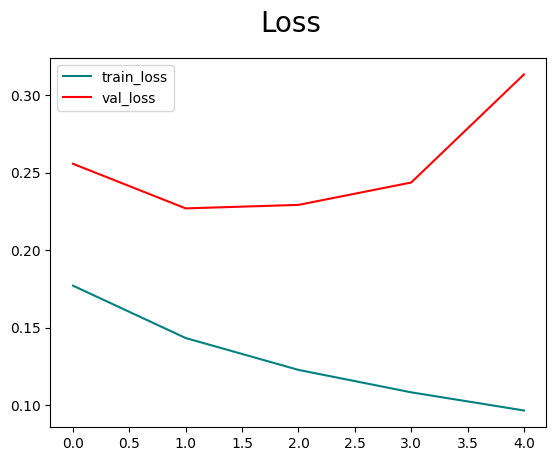

In [82]:
fig =plt.figure()
plt.plot(hist.history['loss'], color ='teal', label ='train_loss')
plt.plot(hist.history['val_loss'], color ='red', label ='val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

# Evaluate on the test dataset

In [83]:
preds_labels =  model.predict(X_test)
preds_labels = label_binarizer.inverse_transform(preds_labels)

4673/4673 [==============================] - 8s 2ms/step


normalized confusion matrix


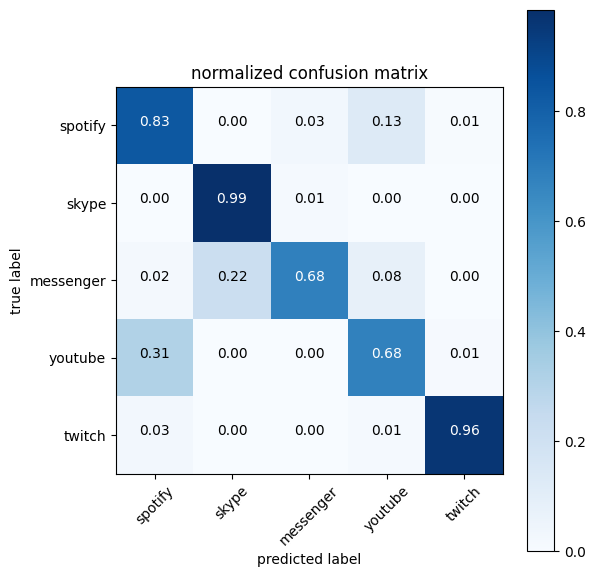

In [84]:
plot_confusion_matrix(y_test,preds_labels)

# Evaluate on the train dataset

In [85]:
preds_labels =  model.predict(X_train)
preds_labels = label_binarizer.inverse_transform(preds_labels)
true_labels = label_binarizer.inverse_transform(y_train_encoded)

10797/10797 [==============================] - 16s 1ms/step


normalized confusion matrix


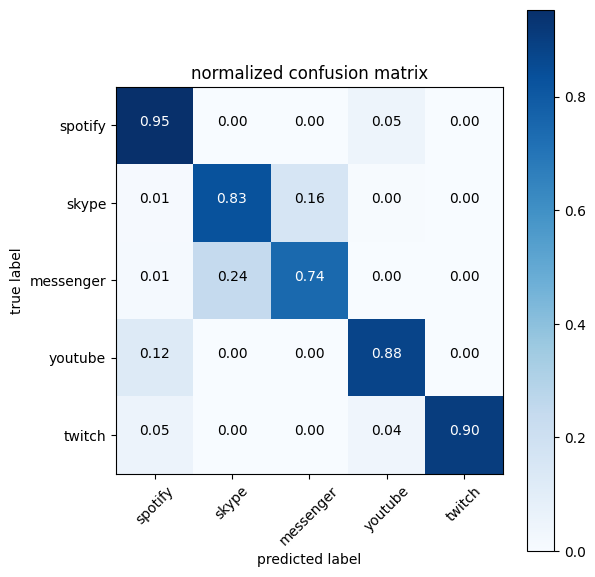

In [86]:
plot_confusion_matrix(true_labels,preds_labels)

# Evaluate on the val dataset

In [87]:
preds_labels =  model.predict(X_val)
preds_labels = label_binarizer.inverse_transform(preds_labels)
true_labels = label_binarizer.inverse_transform(y_val_encoded)

110/110 [==============================] - 0s 2ms/step


normalized confusion matrix


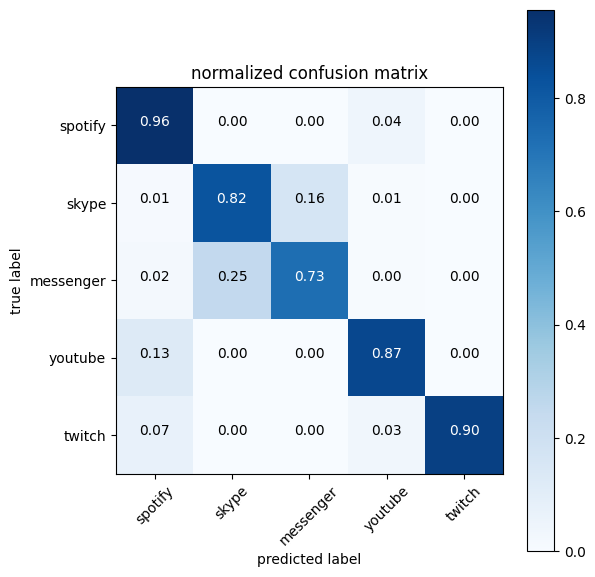

In [88]:
plot_confusion_matrix(true_labels,preds_labels)